602 Assignment Week4: 
Kratika Aggarwal Fall'22

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#boston is a the dataframe df containing Boston data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df_target = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
df_target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


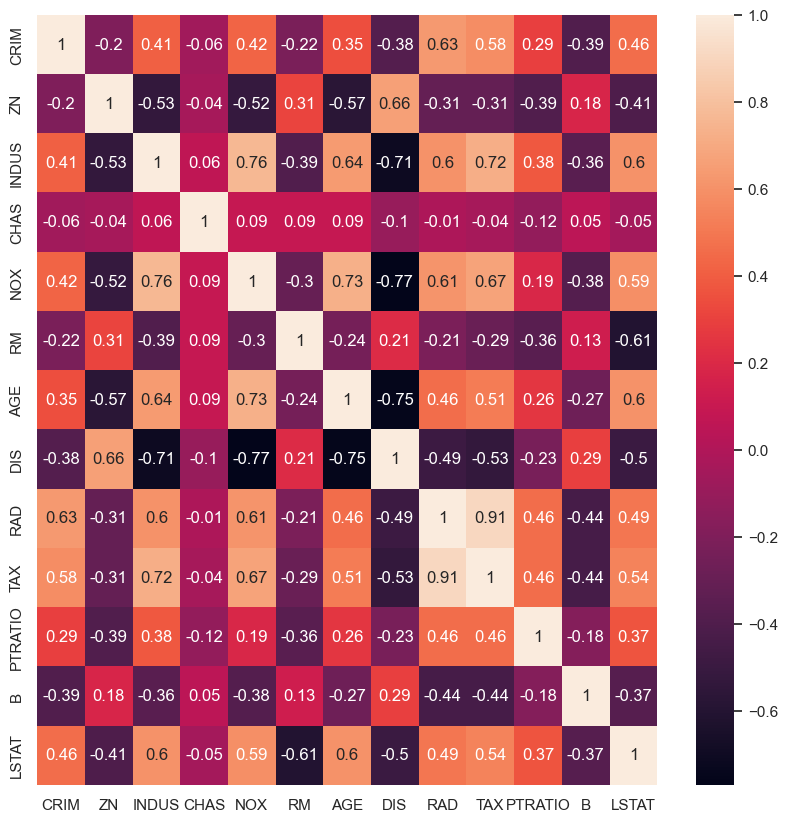

In [8]:
correlation_matrix = boston.corr().round(2)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### 1. Simple Regression Using statsmodel

In [9]:
x = boston['RM']
y = df_target

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                   3.74e-256
Time:                        14:51:20   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 2. Multiple Regression Using statsmodel

In [10]:
x = boston[['RM','LSTAT']]
y = df_target

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        14:51:20   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Result:
1. R2 square tells measures how well a statistical model predicts an outcome. As our R2 is above 0.9 ie. 0.948 hence it shows that our model can highly predict the outcome. Hence reliable.
2. The outcome of the Durbin-Watson test ranges from 0 to 4. An outcome closely around 2 means a very low level of autocorrelation. An outcome closer to 0 suggests a stronger positive autocorrelation, and an outcome closer to 4 suggests a stronger negative autocorrelation. As our value is 0.834 it shows stronger positive autocorrelation.
3. Looking the following values we can safely conclude that our data is not normally distributed:
    a. Jarque-Bera (JB): A value closer to zero suggests normal distribution, which in our case is 442.157
    b. Skew: A value in between -0.5 to 0.5 shows normal distribution, which in our case is 1.351 hence it is longer on the right side.
    c. Kurtosis: A value in between -3 to 3 shows normal distribution, which in our case is 6.698 hence it is tall distribution.

### 3. Multiple Regression Using scikitlearn

In [11]:
X_two = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = df_target

#import train data (smaller)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_two, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 2)
(127, 2)
(379, 1)
(127, 1)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train, Y_train)

y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print('Root Mean Squared Error is {',rmse,'}')
r2 = r2_score(Y_train, y_train_predict)
print('R2(Coefficient of Determination) score is {}'.format(r2))

Root Mean Squared Error is { 5.526318132474909 }
R2(Coefficient of Determination) score is 0.6405777809852187


In [13]:
print(y_train_predict)

[[17.29740728]
 [22.80474386]
 [36.88538424]
 [37.23799881]
 [24.39959106]
 [13.80450572]
 [17.91467105]
 [18.07621634]
 [21.61045654]
 [14.57245332]
 [ 3.89194598]
 [27.36211466]
 [30.13557085]
 [21.85239878]
 [20.2504938 ]
 [19.08546231]
 [22.27622941]
 [31.45778188]
 [23.04921233]
 [29.13287717]
 [19.49718783]
 [23.69675492]
 [28.00901681]
 [14.53151779]
 [32.66947952]
 [15.68844794]
 [16.04771203]
 [28.12299762]
 [32.56132313]
 [14.75938732]
 [28.07690382]
 [32.59454673]
 [31.08830019]
 [21.54546632]
 [31.38378856]
 [ 5.84975515]
 [31.32905021]
 [26.57465934]
 [18.64793638]
 [18.72632802]
 [17.00522395]
 [30.9041606 ]
 [12.86658552]
 [23.83798967]
 [21.6023432 ]
 [15.46925553]
 [18.49009926]
 [18.32292915]
 [16.6114794 ]
 [22.8952269 ]
 [31.85956655]
 [22.94144878]
 [15.24922602]
 [31.12258106]
 [35.72764442]
 [22.45559157]
 [24.49127317]
 [15.09673697]
 [18.26237496]
 [35.8280923 ]
 [26.35875311]
 [32.09246112]
 [25.6353314 ]
 [19.13633869]
 [22.61448767]
 [21.31723652]
 [17.67724

In [14]:
lm.coef_

array([[-0.67758923,  4.91580979]])

In [15]:
lm.intercept_

array([0.18582216])